In [1]:
# paired genset with load

import matplotlib.pyplot as plt
import numpy as np

# define needed function
# find closest value in array
def find_nearest(x,value):
    idx = np.abs(x[np.isfinite(x)] - value).argmin()
    #print(f"idx for {value} is {idx}")
    return idx

In [2]:
# part 1.2 from lab 2
# define space
N = 140
mult = 2
offset = N//mult
pq_width = 100
p = np.linspace(-pq_width,pq_width,N)
q = np.linspace(-pq_width,pq_width,N)

# full-load targets
# by design
f_bus = 60      # Hz
v_bus = 120     # V
s_bus = 120     # VA
s_phi = .33 * s_bus

# no-load intercepts
# from collected data
f1_nl = 60.54    # Hz
f2_nl = 60.54    # Hz
v1_nl = 128     # V
v2_nl = 128     # V
# full load data
p_fl = 40
q_fl = 40

In [3]:
# define droop values for each generator
Sp1 = p_fl / abs(f1_nl - f_bus)
Sp2 = p_fl / abs(f2_nl - f_bus)
Sq1 = q_fl / abs(v1_nl - v_bus)
Sq2 = q_fl / abs(v2_nl - v_bus)
#explicitly define Sp,Sq instead
Sp1 = 33.44
Sp2 = 53.4
Sq1 = 1.7
Sq2 = 2.8
# invert 
Sp1_inv = 1/Sp1
Sp2_inv = 1/Sp2
Sq1_inv = 1/Sq1
Sq2_inv = 1/Sq2
print(f"Sp1: {Sp1:.2f}")
print(f"Sp2: {Sp2:.2f}")
print(f"Sq1: {Sq1:.2f}")
print(f"Sq2: {Sq2:.2f}")

print(f"Sp1 inv: {Sp1_inv:.2f}")
print(f"Sp2 inv: {Sp2_inv:.2f}")
print(f"Sq1 inv: {Sq1_inv:.2f}")
print(f"Sq2 inv: {Sq2_inv:.2f}")

Sp1: 33.44
Sp2: 53.40
Sq1: 1.70
Sq2: 2.80
Sp1 inv: 0.03
Sp2 inv: 0.02
Sq1 inv: 0.59
Sq2 inv: 0.36


In [4]:
# find no-load points for a given load
# given load
pf = 0.8
qL = s_bus * np.sin(np.arccos(pf))
pL = pf * s_bus
# generator reactive power equally shared
qG = .5*qL
qG1 = qG
qG2 = qG
# find v_nl
v1_nl = (qG1 + Sq1*v_bus) / Sq1
v2_nl = (qG2 + Sq2*v_bus) / Sq2
print(f"v1_nl = {v1_nl:.2f} V")
print(f"v2_nl = {v2_nl:.2f} V")
# generator real power equally shared
pG = .5*pL
pG1 = pG
pG2 = pG
# find f_nl
f1_nl = (pG1 + Sp1*f_bus) / Sp1
f2_nl = (pG2 + Sp2*f_bus) / Sp2

# define lines
# define the P and Q slopes
fP1 = -Sp1_inv * p + f1_nl
fP2 = Sp2_inv * p + f2_nl
qV1 = -Sq1_inv * q + v1_nl
qV2 = Sq2_inv * q + v2_nl

v1_nl = 141.18 V
v2_nl = 132.86 V


In [5]:
# find intersection of unloaded fP1 and fP2
idx_fP = find_nearest(fP1,fP2)
idx_qV = find_nearest(qV1,qV2)
print(f"fP1, fP2 intersect: {fP1[idx_fP]:.2f} Hz")
print(f"qV1, qV2 intersect: {qV1[idx_qV]:.2f} V")

# find intersection of droop lines and vbus
idx_qV1 = find_nearest(qV1,v_bus)
idx_qV2 = find_nearest(qV2,v_bus)
# find intersection of droop lines and fbus
idx_fP1 = find_nearest(fP1,f_bus)
idx_fP2 = find_nearest(fP2,f_bus)

fP1, fP2 intersect: 61.11 Hz
qV1, qV2 intersect: 135.67 V


Text(-48.201438848920866, 56, 'P2')

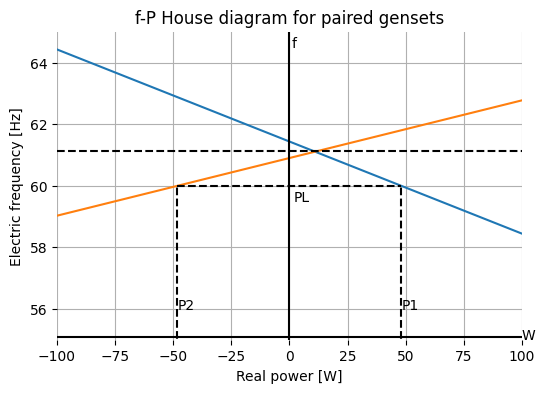

In [6]:
# plot f-P diagram
fmax = 65
fmin = 55
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(fmin,fmax)
# plot lines
plt.plot(p,fP1)
plt.plot(p,fP2)
# vertical axis in the middle
plt.vlines(0,fmin,fmax,colors='k')
# horizontal axis at the bottom
plt.hlines(fmin+.08,-pq_width,pq_width,colors='k')
# horizontal dashed line at pL
plt.hlines(f_bus,p[idx_fP2],p[idx_fP1],colors='k',linestyles='dashed')
# horizontal dashed line at unloaded intersection
plt.hlines(fP1[idx_fP],-pq_width,pq_width,colors='k',linestyles='dashed')
# vertical lines at pG1, pG2
plt.vlines(p[idx_fP1],0,fP1[idx_fP1],colors='k',linestyles='dashed',label='P1')
plt.vlines(p[idx_fP2],0,fP2[idx_fP2],colors='k',linestyles='dashed',label='P2')
# labels
plt.title('f-P House diagram for paired gensets')
plt.xlabel('Real power [W]')
plt.ylabel('Electric frequency [Hz]')
plt.text(1,fmax-.5,"f")
plt.text(pq_width,fmin,"W")
plt.text(2,f_bus-.5,"PL")
plt.text(p[idx_fP1],fmin+1,"P1")
plt.text(p[idx_fP2],fmin+1,"P2")
#plt.show()

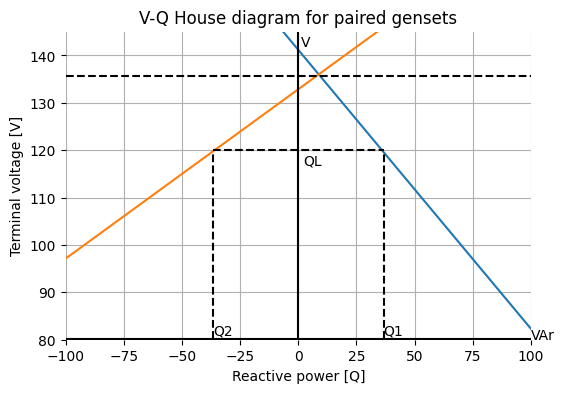

In [7]:
# plot V-Q diagram
vmax = 145
vmin = 80
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(vmin,vmax)
# plot lines
plt.plot(q,qV1)
plt.plot(q,qV2)
# vertical middle axis
plt.vlines(0,vmin,vmax,colors='k')
# horizontal bottom axis
plt.hlines(vmin+.1,-pq_width,pq_width,colors='k')
# horizontal line at qL
plt.hlines(v_bus,q[idx_qV2],q[idx_qV1],colors='k',linestyles='dashed')
# dashed line at intersect
plt.hlines(qV1[idx_qV],-pq_width,pq_width,colors='k',linestyles='dashed')
# vertical lines at qG1, qG2
plt.vlines(q[idx_qV1],0,qV1[idx_qV1],colors='k',linestyles='dashed',label='Q1')
plt.vlines(q[idx_qV2],0,qV2[idx_qV2],colors='k',linestyles='dashed',label='Q2')
# labels
plt.title('V-Q House diagram for paired gensets')
plt.xlabel('Reactive power [Q]')
plt.ylabel('Terminal voltage [V]')
plt.text(1,vmax-3,"V")
plt.text(pq_width,vmin,"VAr")
plt.text(2,v_bus-3,"QL")
plt.text(q[idx_qV1],vmin+1,"Q1")
plt.text(q[idx_qV2],vmin+1,"Q2")
plt.show()

In [8]:
# paired genset with load

import matplotlib.pyplot as plt
import numpy as np

# define needed function
# find closest value in array
def find_nearest(x,value):
    idx = np.abs(x[np.isfinite(x)] - value).argmin()
    #print(f"idx for {value} is {idx}")
    return idx

In [9]:
# part 1.2 from lab 2
# define space
N = 140
mult = 2
offset = N//mult
pq_width = 100
p = np.linspace(-pq_width,pq_width,N)
q = np.linspace(-pq_width,pq_width,N)

# full-load targets
# by design
f_bus = 60      # Hz
v_bus = 120     # V
s_bus = 120     # VA
s_phi = .33 * s_bus

# no-load intercepts
# from collected data
f1_nl = 60.54    # Hz
f2_nl = 60.54    # Hz
v1_nl = 128     # V
v2_nl = 128     # V
# full load data
p_fl = 40
q_fl = 40

In [10]:
# define droop values for each generator
Sp1 = p_fl / abs(f1_nl - f_bus)
Sp2 = p_fl / abs(f2_nl - f_bus)
Sq1 = q_fl / abs(v1_nl - v_bus)
Sq2 = q_fl / abs(v2_nl - v_bus)
#explicitly define Sp,Sq instead
Sp1 = 33.44
Sp2 = 53.4
Sq1 = 1.7
Sq2 = 2.8
# invert 
Sp1_inv = 1/Sp1
Sp2_inv = 1/Sp2
Sq1_inv = 1/Sq1
Sq2_inv = 1/Sq2
print(f"Sp1: {Sp1:.2f}")
print(f"Sp2: {Sp2:.2f}")
print(f"Sq1: {Sq1:.2f}")
print(f"Sq2: {Sq2:.2f}")

print(f"Sp1 inv: {Sp1_inv:.2f}")
print(f"Sp2 inv: {Sp2_inv:.2f}")
print(f"Sq1 inv: {Sq1_inv:.2f}")
print(f"Sq2 inv: {Sq2_inv:.2f}")

Sp1: 33.44
Sp2: 53.40
Sq1: 1.70
Sq2: 2.80
Sp1 inv: 0.03
Sp2 inv: 0.02
Sq1 inv: 0.59
Sq2 inv: 0.36


In [11]:
# find no-load points for a given load
# given load
pf = 0.8
qL = s_bus * np.sin(np.arccos(pf))
pL = pf * s_bus
# generator reactive power equally shared
qG = .5*qL
qG1 = qG
qG2 = qG
# find v_nl
v1_nl = (qG1 + Sq1*v_bus) / Sq1
v2_nl = (qG2 + Sq2*v_bus) / Sq2
print(f"v1_nl = {v1_nl:.2f} V")
print(f"v2_nl = {v2_nl:.2f} V")
# generator real power equally shared
pG = .5*pL
pG1 = pG
pG2 = pG
# find f_nl
f1_nl = (pG1 + Sp1*f_bus) / Sp1
f2_nl = (pG2 + Sp2*f_bus) / Sp2

# define lines
# define the P and Q slopes
fP1 = -Sp1_inv * p + f1_nl
fP2 = Sp2_inv * p + f2_nl
qV1 = -Sq1_inv * q + v1_nl
qV2 = Sq2_inv * q + v2_nl

v1_nl = 141.18 V
v2_nl = 132.86 V


In [12]:
# find intersection of unloaded fP1 and fP2
idx_fP = find_nearest(fP1,fP2)
idx_qV = find_nearest(qV1,qV2)
print(f"fP1, fP2 intersect: {fP1[idx_fP]:.2f} Hz")
print(f"qV1, qV2 intersect: {qV1[idx_qV]:.2f} V")

# find intersection of droop lines and vbus
idx_qV1 = find_nearest(qV1,v_bus)
idx_qV2 = find_nearest(qV2,v_bus)
# find intersection of droop lines and fbus
idx_fP1 = find_nearest(fP1,f_bus)
idx_fP2 = find_nearest(fP2,f_bus)

fP1, fP2 intersect: 61.11 Hz
qV1, qV2 intersect: 135.67 V


Text(-48.201438848920866, 56, 'P2')

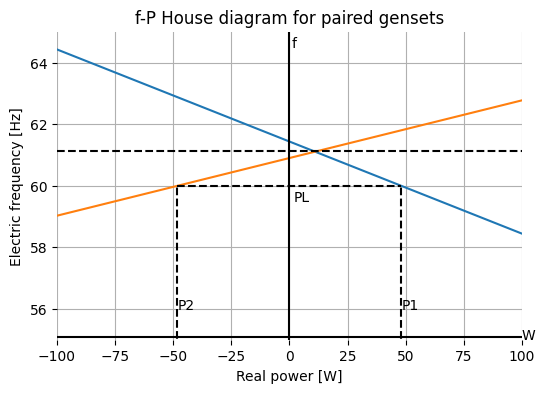

In [13]:
# plot f-P diagram
fmax = 65
fmin = 55
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(fmin,fmax)
# plot lines
plt.plot(p,fP1)
plt.plot(p,fP2)
# vertical axis in the middle
plt.vlines(0,fmin,fmax,colors='k')
# horizontal axis at the bottom
plt.hlines(fmin+.08,-pq_width,pq_width,colors='k')
# horizontal dashed line at pL
plt.hlines(f_bus,p[idx_fP2],p[idx_fP1],colors='k',linestyles='dashed')
# horizontal dashed line at unloaded intersection
plt.hlines(fP1[idx_fP],-pq_width,pq_width,colors='k',linestyles='dashed')
# vertical lines at pG1, pG2
plt.vlines(p[idx_fP1],0,fP1[idx_fP1],colors='k',linestyles='dashed',label='P1')
plt.vlines(p[idx_fP2],0,fP2[idx_fP2],colors='k',linestyles='dashed',label='P2')
# labels
plt.title('f-P House diagram for paired gensets')
plt.xlabel('Real power [W]')
plt.ylabel('Electric frequency [Hz]')
plt.text(1,fmax-.5,"f")
plt.text(pq_width,fmin,"W")
plt.text(2,f_bus-.5,"PL")
plt.text(p[idx_fP1],fmin+1,"P1")
plt.text(p[idx_fP2],fmin+1,"P2")
#plt.show()

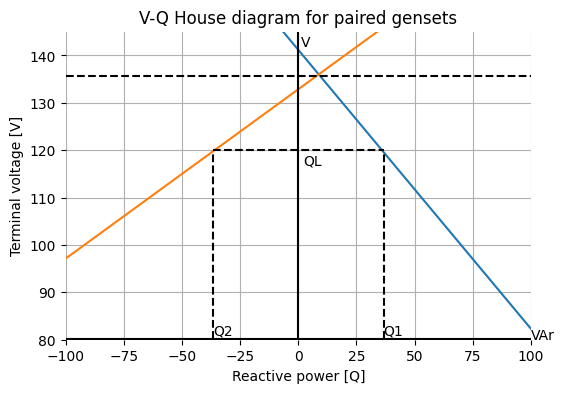

In [14]:
# plot V-Q diagram
vmax = 145
vmin = 80
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(vmin,vmax)
# plot lines
plt.plot(q,qV1)
plt.plot(q,qV2)
# vertical middle axis
plt.vlines(0,vmin,vmax,colors='k')
# horizontal bottom axis
plt.hlines(vmin+.1,-pq_width,pq_width,colors='k')
# horizontal line at qL
plt.hlines(v_bus,q[idx_qV2],q[idx_qV1],colors='k',linestyles='dashed')
# dashed line at intersect
plt.hlines(qV1[idx_qV],-pq_width,pq_width,colors='k',linestyles='dashed')
# vertical lines at qG1, qG2
plt.vlines(q[idx_qV1],0,qV1[idx_qV1],colors='k',linestyles='dashed',label='Q1')
plt.vlines(q[idx_qV2],0,qV2[idx_qV2],colors='k',linestyles='dashed',label='Q2')
# labels
plt.title('V-Q House diagram for paired gensets')
plt.xlabel('Reactive power [Q]')
plt.ylabel('Terminal voltage [V]')
plt.text(1,vmax-3,"V")
plt.text(pq_width,vmin,"VAr")
plt.text(2,v_bus-3,"QL")
plt.text(q[idx_qV1],vmin+1,"Q1")
plt.text(q[idx_qV2],vmin+1,"Q2")
plt.show()

In [15]:
# paired genset with load

import matplotlib.pyplot as plt
import numpy as np

# define needed function
# find closest value in array
def find_nearest(x,value):
    idx = np.abs(x[np.isfinite(x)] - value).argmin()
    #print(f"idx for {value} is {idx}")
    return idx

In [16]:
# part 1.2 from lab 2
# define space
N = 140
mult = 2
offset = N//mult
pq_width = 100
p = np.linspace(-pq_width,pq_width,N)
q = np.linspace(-pq_width,pq_width,N)

# full-load targets
# by design
f_bus = 60      # Hz
v_bus = 120     # V
s_bus = 120     # VA
s_phi = .33 * s_bus

# no-load intercepts
# from collected data
f1_nl = 60.54    # Hz
f2_nl = 60.54    # Hz
v1_nl = 128     # V
v2_nl = 128     # V
# full load data
p_fl = 40
q_fl = 40

In [17]:
# define droop values for each generator
Sp1 = p_fl / abs(f1_nl - f_bus)
Sp2 = p_fl / abs(f2_nl - f_bus)
Sq1 = q_fl / abs(v1_nl - v_bus)
Sq2 = q_fl / abs(v2_nl - v_bus)
#explicitly define Sp,Sq instead
Sp1 = 33.44
Sp2 = 53.4
Sq1 = 1.7
Sq2 = 2.8
# invert 
Sp1_inv = 1/Sp1
Sp2_inv = 1/Sp2
Sq1_inv = 1/Sq1
Sq2_inv = 1/Sq2
print(f"Sp1: {Sp1:.2f}")
print(f"Sp2: {Sp2:.2f}")
print(f"Sq1: {Sq1:.2f}")
print(f"Sq2: {Sq2:.2f}")

print(f"Sp1 inv: {Sp1_inv:.2f}")
print(f"Sp2 inv: {Sp2_inv:.2f}")
print(f"Sq1 inv: {Sq1_inv:.2f}")
print(f"Sq2 inv: {Sq2_inv:.2f}")

Sp1: 33.44
Sp2: 53.40
Sq1: 1.70
Sq2: 2.80
Sp1 inv: 0.03
Sp2 inv: 0.02
Sq1 inv: 0.59
Sq2 inv: 0.36


In [18]:
# find no-load points for a given load
# given load
pf = 0.8
qL = s_bus * np.sin(np.arccos(pf))
pL = pf * s_bus
# generator reactive power equally shared
qG = .5*qL
qG1 = qG
qG2 = qG
# find v_nl
v1_nl = (qG1 + Sq1*v_bus) / Sq1
v2_nl = (qG2 + Sq2*v_bus) / Sq2
print(f"v1_nl = {v1_nl:.2f} V")
print(f"v2_nl = {v2_nl:.2f} V")
# generator real power equally shared
pG = .5*pL
pG1 = pG
pG2 = pG
# find f_nl
f1_nl = (pG1 + Sp1*f_bus) / Sp1
f2_nl = (pG2 + Sp2*f_bus) / Sp2

# define lines
# define the P and Q slopes
fP1 = -Sp1_inv * p + f1_nl
fP2 = Sp2_inv * p + f2_nl
qV1 = -Sq1_inv * q + v1_nl
qV2 = Sq2_inv * q + v2_nl

v1_nl = 141.18 V
v2_nl = 132.86 V


In [19]:
# find intersection of unloaded fP1 and fP2
idx_fP = find_nearest(fP1,fP2)
idx_qV = find_nearest(qV1,qV2)
print(f"fP1, fP2 intersect: {fP1[idx_fP]:.2f} Hz")
print(f"qV1, qV2 intersect: {qV1[idx_qV]:.2f} V")

# find intersection of droop lines and vbus
idx_qV1 = find_nearest(qV1,v_bus)
idx_qV2 = find_nearest(qV2,v_bus)
# find intersection of droop lines and fbus
idx_fP1 = find_nearest(fP1,f_bus)
idx_fP2 = find_nearest(fP2,f_bus)

fP1, fP2 intersect: 61.11 Hz
qV1, qV2 intersect: 135.67 V


Text(-48.201438848920866, 56, 'P2')

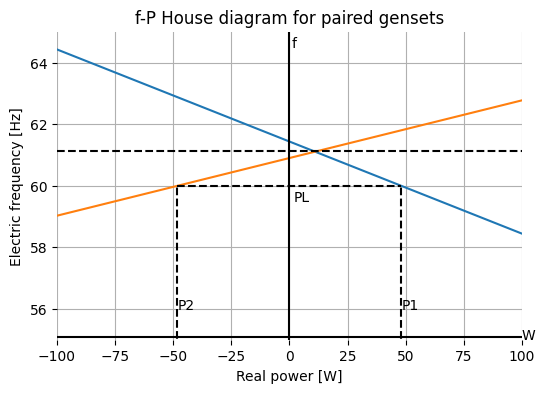

In [20]:
# plot f-P diagram
fmax = 65
fmin = 55
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(fmin,fmax)
# plot lines
plt.plot(p,fP1)
plt.plot(p,fP2)
# vertical axis in the middle
plt.vlines(0,fmin,fmax,colors='k')
# horizontal axis at the bottom
plt.hlines(fmin+.08,-pq_width,pq_width,colors='k')
# horizontal dashed line at pL
plt.hlines(f_bus,p[idx_fP2],p[idx_fP1],colors='k',linestyles='dashed')
# horizontal dashed line at unloaded intersection
plt.hlines(fP1[idx_fP],-pq_width,pq_width,colors='k',linestyles='dashed')
# vertical lines at pG1, pG2
plt.vlines(p[idx_fP1],0,fP1[idx_fP1],colors='k',linestyles='dashed',label='P1')
plt.vlines(p[idx_fP2],0,fP2[idx_fP2],colors='k',linestyles='dashed',label='P2')
# labels
plt.title('f-P House diagram for paired gensets')
plt.xlabel('Real power [W]')
plt.ylabel('Electric frequency [Hz]')
plt.text(1,fmax-.5,"f")
plt.text(pq_width,fmin,"W")
plt.text(2,f_bus-.5,"PL")
plt.text(p[idx_fP1],fmin+1,"P1")
plt.text(p[idx_fP2],fmin+1,"P2")
#plt.show()

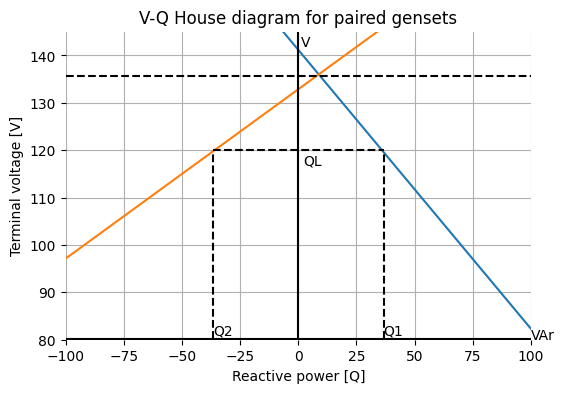

In [21]:
# plot V-Q diagram
vmax = 145
vmin = 80
fig = plt.figure(figsize=(6,4))
# frame
plt.box(False)
plt.grid(visible=True)
plt.xlim(-pq_width,pq_width)
plt.ylim(vmin,vmax)
# plot lines
plt.plot(q,qV1)
plt.plot(q,qV2)
# vertical middle axis
plt.vlines(0,vmin,vmax,colors='k')
# horizontal bottom axis
plt.hlines(vmin+.1,-pq_width,pq_width,colors='k')
# horizontal line at qL
plt.hlines(v_bus,q[idx_qV2],q[idx_qV1],colors='k',linestyles='dashed')
# dashed line at intersect
plt.hlines(qV1[idx_qV],-pq_width,pq_width,colors='k',linestyles='dashed')
# vertical lines at qG1, qG2
plt.vlines(q[idx_qV1],0,qV1[idx_qV1],colors='k',linestyles='dashed',label='Q1')
plt.vlines(q[idx_qV2],0,qV2[idx_qV2],colors='k',linestyles='dashed',label='Q2')
# labels
plt.title('V-Q House diagram for paired gensets')
plt.xlabel('Reactive power [Q]')
plt.ylabel('Terminal voltage [V]')
plt.text(1,vmax-3,"V")
plt.text(pq_width,vmin,"VAr")
plt.text(2,v_bus-3,"QL")
plt.text(q[idx_qV1],vmin+1,"Q1")
plt.text(q[idx_qV2],vmin+1,"Q2")
plt.show()